The purpose of this notebook is to visualize the statistics for teams in the NCAA. This can be used to visualize trends, and try out different types of derived statistics. 

This first portion of the notebook is to set up the datasets with the base data. See PushTheEnvelope for more info on the initial "raw" datasets

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
#Read in Base Datasets: 
folder = '/home/daniel/dev/marchMadness/data/2022_kaggle_vanilla/mens-march-mania-2022/MDataFiles_Stage1/'
#Seeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
#Conferences = pd.read_csv(folder+'MTeamConferences.csv')
RegularDetail = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')
#TourneyCompact = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')

This is the "cleaning up" of the Regular Detail CSV. Splits it into Season Averages for more stat manipulation

In [3]:
winTeams = pd.DataFrame()
loseTeams = pd.DataFrame()

columns = ['Season', 'DayNum' ,'TeamID', 'Points', 'OppTeamID', 'OppPoints','Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA','OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA','OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO','OppStl', 'OppBlk', 'OppPF']

winTeams[columns]  = RegularDetail[['Season', 'DayNum',  'WTeamID', 'WScore', 'LTeamID','LScore','WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA','WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA','LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO','LStl','LBlk', 'LPF']]

winTeams['Win'] = 1
winTeams['Loss'] = 0

loseTeams[columns] = RegularDetail[['Season', 'DayNum', 'LTeamID', 'LScore','WTeamID','WScore','WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA','LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA','WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO','WStl','WBlk', 'WPF']]
def change_loc(loc):
    if loc == 'H':
        return 'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'
    
loseTeams['Loc'] = loseTeams['Loc'].apply(change_loc)    
    
loseTeams['Win'] = 0
loseTeams['Loss'] = 1    
    
winloseTeams = pd.concat([winTeams, loseTeams])
#The following line is modified from the original state so that we can extract teams. 
combinedTeams = winloseTeams.groupby(['Season','TeamID']).sum()
combinedTeams['NumGames'] = combinedTeams['Win'] + combinedTeams['Loss']


display(RegularDetail)
display(combinedTeams)
    
    

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11


DayNum  Points  OppTeamID  OppPoints  NumOT  FGM   FGA  FGM3  \
Season TeamID                                                                 
2003   1102      2029    1603      36930       1596      0  536  1114   219   
       1103      2078    2127      33977       2110      8  733  1508   147   
       1104      2032    1940      35914       1820      1  673  1601   178   
       1105      2036    1866      33024       1993      4  634  1602   197   
       1106      2072    1781      34867       1785      1  656  1548   171   
...               ...     ...        ...        ...    ...  ...   ...   ...   
2022   1468      1091    1332      25765       1418      1  501  1097   143   
       1469      1017    1321      25288       1473      0  458  1111   123   
       1470      1114    1332      27666       1396      1  475  1153   108   
       1471      1110    1342      25114       1422      1  454  1048   162   
       1472       944    1382      24866       1484      0  496  1140   204   

               FGA3  FTM  ...  OppOR  OppDR  OppAst  OppTO  OppStl  OppBlk  \
Season TeamID             ...                                                
2003   1102     583  312  ...    269    564     256    363     152      44   
       1103     434  514  ...    325    595     418    414     173      77   
       1104     556  416  ...    305    634     327    388     155      89   
       1105     540  401  ...    343    686     411    489     244     109   
       1106     494  298  ...    317    626     330    422     246      89   
...             ...  ...  ...    ...    ...     ...    ...     ...     ...   
2022   1468     442  187  ...    178    461     275    225     113      46   
       1469     411  282  ...    169    498     289    237     146      78   
       1470     350  274  ...    182    511     288    332      91     119   
       1471     474  272  ...    170    497     257    238     137      52   
       1472     571  186  ...    143    498     263    202      75      69   

               OppPF  Win  Loss  NumGames  
Season TeamID                              
2003   1102      514   12    16        28  
       1103      606   13    14        27  
       1104      539   17    11        28  
       1105      496    7    19        26  
       1106      452   13    15        28  
...              ...  ...   ...       ...  
2022   1468      318    9    11        20  
       1469      389    7    12        19  
       1470      366    8    13        21  
       1471      353    8    12        20  
       1472      290    5    14        19  

[6892 rows x 34 columns]

Leaving additional space here for further imports and data manipulation as this project continues on. 

Select a team by ID# & Charts will be created. 

In [4]:
teamID = 1234

In [5]:
regSeasonGames = winloseTeams[winloseTeams["TeamID"] == teamID]

regSeasonGames = regSeasonGames.sort_values(by=['Season','DayNum'])
regSeasonGames 

seasonSummary = regSeasonGames.groupby(['Season']).sum()
seasonSumary = seasonSummary.pop('TeamID')
seasonSumary = seasonSummary.pop('OppTeamID')
seasonSumary = seasonSummary.pop('DayNum')

display(regSeasonGames)
display(seasonSummary)




,Season,DayNum,TeamID,Points,OppTeamID,OppPoints,Loc,NumOT,FGM,FGA,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Win,Loss
181,2003,20,1234,79,1194,52,H,0,23,47,...,12,11,18,10,16,9,3,28,1,0
267,2003,22,1234,50,1179,49,A,0,19,54,...,7,12,24,11,17,3,1,15,1,0
396,2003,26,1234,84,1398,51,H,0,33,64,...,9,12,26,12,19,5,7,20,1,0
492,2003,28,1234,67,1199,80,A,0,25,55,...,11,10,15,16,11,15,1,17,0,1
638,2003,32,1234,65,1286,44,H,0,25,50,...,7,7,15,13,13,6,1,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99402,2022,79,1234,46,1353,48,A,0,17,61,...,13,10,35,13,14,7,10,15,0,1
99553,2022,82,1234,68,1336,51,H,0,22,54,...,13,7,21,10,14,4,1,18,1,0
99828,2022,87,1234,73,1345,83,H,0,24,64,...,22,6,26,21,13,7,2,17,0,1
100046,2022,91,1234,86,1336,90,A,2,27,77,...,24,14,38,12,11,6,2,23,0,1


,Points,OppPoints,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Win,Loss
Season,,,,,,,,,,,,,,,,,,,,,
2003,1947,1868,2,679,1516,134,467,455,634,317,...,443,311,611,411,388,206,106,572,15,13
2004,2002,1928,3,683,1491,162,441,474,711,303,...,557,326,647,429,390,205,95,617,16,12
2005,2343,2145,3,821,1772,205,541,496,720,355,...,624,384,731,445,488,222,98,628,21,11
2006,2191,1939,4,763,1770,185,552,480,680,363,...,493,369,768,412,488,248,98,625,25,8
2007,2121,2035,0,739,1684,195,540,448,602,344,...,552,373,684,432,468,187,100,573,17,14
2008,1794,1857,1,616,1455,222,640,340,524,280,...,496,310,664,400,368,242,76,555,13,19
2009,1927,1908,4,650,1469,258,709,369,496,250,...,503,305,638,384,355,171,84,540,15,17
2010,1937,2112,1,675,1629,239,753,348,503,317,...,505,293,726,439,349,214,109,524,10,22
2011,2084,2110,2,766,1743,146,465,406,601,371,...,489,340,705,466,445,215,106,551,11,20


TODO: Make plots.




Also make plots. 
    
    

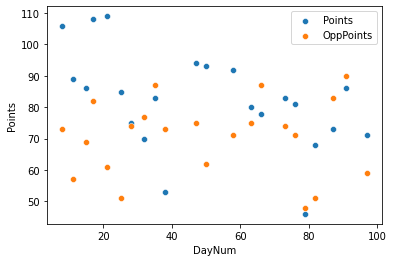

In [34]:
yearStats = regSeasonGames[regSeasonGames['Season'] == 2022]

#display(yearStats)


#sns.scatterplot(data=yearStats, x = "DayNum", y = "Points")


fig, ax = plt.subplots()

sns.scatterplot(data=yearStats, x = "DayNum", y = "Points", ax=ax)
sns.scatterplot(data=yearStats, x = "DayNum", y = "OppPoints", ax=ax)
plt.legend(labels=["Points","OppPoints"])

Start developing derived stats (Done on small subset to see results)

In [37]:
display(yearStats.columns.values)

array(['Season', 'DayNum', 'TeamID', 'Points', 'OppTeamID', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR',
       'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR',
       'OppAst', 'OppTO', 'OppStl', 'OppBlk', 'OppPF', 'Win', 'Loss'],
      dtype=object)

In [54]:
DerivedStats = pd.DataFrame()

DerivedStats['MarginOfVictory'] = yearStats['Points'] - yearStats['OppPoints']
DerivedStats['CombinedPoints']  = yearStats['Points'] + yearStats['OppPoints']
DerivedStats['Posessions']      = yearStats['FGA'] + yearStats['FGA3'] - yearStats['OR'] + yearStats['TO'] + (.44 * yearStats['FTA'])
DerivedStats['OppPosessions']   = yearStats['OppFGA'] + yearStats['OppFGA3'] - yearStats['OppOR'] + yearStats['OppTO'] + (.44 * yearStats['OppFTA'])
DerivedStats['TotalPosessions'] = DerivedStats['Posessions'] + DerivedStats['OppPosessions']
DerivedStats['Posession%']      = DerivedStats['Posessions'] / DerivedStats['TotalPosessions'] 
DerivedStats['TO%']             = yearStats['TO'] / DerivedStats['Posessions']
DerivedStats['OppTO%']          = yearStats['OppTO'] / DerivedStats['OppPosessions']
DerivedStats['OR%']             = yearStats['OR'] / (yearStats['FGA'] + yearStats['FGA3'] - (yearStats['FGM'] + yearStats['FGM3']))
DerivedStats['DR%']             = yearStats['DR'] / (yearStats['OppFGA'] + yearStats['OppFGA3'] - (yearStats['OppFGM'] + yearStats['OppFGM3']))
DerivedStats['PPP']             = yearStats['Points'] / DerivedStats['Posessions']
DerivedStats['OppPPP']          = yearStats['OppPoints'] / DerivedStats['OppPosessions']


DerivedStats['FG%']             = yearStats['FGM'] / yearStats ['FGA']
DerivedStats['FG3%']            = yearStats['FGM3'] / yearStats ['FGA3']
DerivedStats['FGTot%']          = (yearStats['FGM'] + yearStats['FGM3'])  / (yearStats ['FGA'] + yearStats['FGA3'])
DerivedStats['eFG%']            = (yearStats['FGM'] + (yearStats['FGM3'] * 1.5))  / (yearStats ['FGA'] + yearStats['FGA3'])
DerivedStats['OppFG%']          = yearStats['OppFGM'] / yearStats ['OppFGA']
DerivedStats['OppFG3%']         = yearStats['OppFGM3'] / yearStats ['OppFGA3']
DerivedStats['OppFGTot%']       = (yearStats['OppFGM'] + yearStats['OppFGM3'])  / (yearStats ['OppFGA'] + yearStats['OppFGA3'])
DerivedStats['OppeFG%']         = (yearStats['OppFGM'] + (yearStats['OppFGM3'] * 1.5))  / (yearStats ['OppFGA'] + yearStats['OppFGA3'])


display(DerivedStats)
display(DerivedStats.describe())


,MarginOfVictory,CombinedPoints,Posessions,OppPosessions,TotalPosessions,Posession%,TO%,OppTO%,OR%,DR%,PPP,OppPPP,FG%,FG3%,FGTot%,eFG%,OppFG%,OppFG3%,OppFGTot%,OppeFG%
96730,33,179,106.68,111.04,217.72,0.489987,0.074991,0.108069,0.191489,0.464789,0.993626,0.657421,0.553846,0.454545,0.520408,0.596939,0.351351,0.281250,0.330189,0.372642
96869,32,146,90.68,93.64,184.32,0.491970,0.088222,0.170867,0.186047,0.604167,0.981473,0.608714,0.523077,0.250000,0.469136,0.493827,0.410714,0.318182,0.384615,0.429487
97063,17,155,94.04,87.28,181.32,0.518641,0.085070,0.171861,0.285714,0.585366,0.914504,0.790559,0.377049,0.217391,0.333333,0.363095,0.474576,0.333333,0.445946,0.479730
97150,26,190,117.04,98.36,215.40,0.543361,0.085441,0.132168,0.288136,0.558140,0.922761,0.833672,0.520548,0.454545,0.495726,0.581197,0.491525,0.458333,0.481928,0.548193
97371,48,170,105.12,104.08,209.20,0.502486,0.066591,0.192160,0.208333,0.372881,1.036910,0.586088,0.527778,0.461538,0.510204,0.571429,0.380952,0.230769,0.337079,0.370787
97566,34,136,93.36,103.96,197.32,0.473140,0.139246,0.221239,0.276596,0.397059,0.910454,0.490573,0.484848,0.315789,0.447059,0.482353,0.307692,0.148148,0.260870,0.282609
97713,1,149,78.40,75.96,154.36,0.507904,0.051020,0.065824,0.189189,0.555556,0.956633,0.974197,0.535714,0.476190,0.519481,0.584416,0.526316,0.500000,0.520000,0.580000
97874,-7,147,96.68,92.28,188.96,0.511643,0.093091,0.162549,0.094340,0.550000,0.724038,0.834417,0.403226,0.238095,0.361446,0.391566,0.420000,0.421053,0.420290,0.478261
98013,-4,170,95.36,94.32,189.68,0.502741,0.041946,0.148431,0.169811,0.212766,0.870386,0.922392,0.449275,0.347826,0.423913,0.467391,0.440678,0.440000,0.440476,0.505952
98113,-20,126,95.60,91.48,187.08,0.511011,0.125523,0.142108,0.191176,0.288462,0.554393,0.797989,0.269841,0.185185,0.244444,0.272222,0.435484,0.320000,0.402299,0.448276


,MarginOfVictory,CombinedPoints,Posessions,OppPosessions,TotalPosessions,Posession%,TO%,OppTO%,OR%,DR%,PPP,OppPPP,FG%,FG3%,FGTot%,eFG%,OppFG%,OppFG3%,OppFGTot%,OppeFG%
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.772727,152.681818,96.078182,93.987273,190.065455,0.505415,0.088097,0.142142,0.205621,0.487669,0.856359,0.754230,0.453345,0.333177,0.421735,0.467749,0.434222,0.332490,0.407145,0.452869
std,17.671424,21.792061,9.368311,8.660288,16.393804,0.019340,0.023977,0.044454,0.052338,0.112960,0.142177,0.139737,0.083017,0.086520,0.079096,0.088561,0.077730,0.111403,0.080752,0.094376
min,-20.000000,94.000000,78.400000,75.960000,154.360000,0.463471,0.041946,0.065824,0.094340,0.212766,0.490196,0.490573,0.269841,0.185185,0.244444,0.272222,0.307692,0.148148,0.260870,0.282609
25%,-3.500000,146.250000,90.850000,88.780000,180.690000,0.493978,0.076507,0.103012,0.173870,0.425517,0.776329,0.631786,0.404271,0.261574,0.364108,0.409641,0.370238,0.280313,0.348816,0.383140
50%,11.000000,155.000000,93.940000,92.960000,186.660000,0.507374,0.086507,0.146627,0.195745,0.487296,0.895253,0.783639,0.477718,0.333333,0.428780,0.481275,0.438081,0.326667,0.411294,0.463268
75%,24.750000,168.000000,98.600000,99.200000,196.940000,0.515604,0.098273,0.168788,0.245640,0.568106,0.943545,0.832513,0.522445,0.397826,0.475617,0.521296,0.491193,0.387228,0.451486,0.500000
max,48.000000,190.000000,117.040000,111.040000,222.880000,0.543361,0.139246,0.236528,0.288136,0.653846,1.047836,0.976212,0.553846,0.476190,0.520408,0.596939,0.612245,0.590909,0.605634,0.697183
